In [129]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('data/citi_bike_data.csv')
df.head()

/var/folders/vs/myrzhnc92f3_skxc82ynczz00000gn/T/ipykernel_61845/4010377021.py:1: DtypeWarning: Columns (3,7,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/citi_bike_data.csv')


,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,ride_id,rideable_type,member_casual
0,148.0,2017-01-01 00:21:32,2017-01-01 00:24:01,3276,Marin Light Rail,40.714584,-74.042817,3185,City Hall,40.717732,-74.043845,24575.0,Subscriber,1983.0,1.0,NaN,NaN,NaN
1,1283.0,2017-01-01 00:24:35,2017-01-01 00:45:58,3183,Exchange Place,40.716247,-74.033459,3198,Heights Elevator,40.748716,-74.040443,24723.0,Subscriber,1978.0,1.0,NaN,NaN,NaN
2,372.0,2017-01-01 00:38:19,2017-01-01 00:44:31,3183,Exchange Place,40.716247,-74.033459,3211,Newark Ave,40.721525,-74.046305,24620.0,Subscriber,1989.0,1.0,NaN,NaN,NaN
3,1513.0,2017-01-01 00:38:37,2017-01-01 01:03:50,3194,McGinley Square,40.725340,-74.067622,3271,Danforth Light Rail,40.692640,-74.088012,24668.0,Subscriber,1961.0,1.0,NaN,NaN,NaN
4,639.0,2017-01-01 01:47:52,2017-01-01 01:58:31,3183,Exchange Place,40.716247,-74.033459,3203,Hamilton Park,40.727596,-74.044247,26167.0,Subscriber,1993.0,1.0,NaN,NaN,NaN


# Dropping duplicated rides

In [131]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(4207977, 18)
(4194526, 18)


# Trip Duration 

Filling duration column with difference between start and stop time and removing outliers

In [132]:
date_cols = ["start_time", "stop_time"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [133]:
df["trip_duration"] = df["trip_duration"].fillna((df["stop_time"] - df["start_time"]).dt.total_seconds())
df.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,ride_id,rideable_type,member_casual
0,148.0,2017-01-01 00:21:32,2017-01-01 00:24:01,3276,Marin Light Rail,40.714584,-74.042817,3185,City Hall,40.717732,-74.043845,24575.0,Subscriber,1983.0,1.0,NaN,NaN,NaN
1,1283.0,2017-01-01 00:24:35,2017-01-01 00:45:58,3183,Exchange Place,40.716247,-74.033459,3198,Heights Elevator,40.748716,-74.040443,24723.0,Subscriber,1978.0,1.0,NaN,NaN,NaN
2,372.0,2017-01-01 00:38:19,2017-01-01 00:44:31,3183,Exchange Place,40.716247,-74.033459,3211,Newark Ave,40.721525,-74.046305,24620.0,Subscriber,1989.0,1.0,NaN,NaN,NaN
3,1513.0,2017-01-01 00:38:37,2017-01-01 01:03:50,3194,McGinley Square,40.725340,-74.067622,3271,Danforth Light Rail,40.692640,-74.088012,24668.0,Subscriber,1961.0,1.0,NaN,NaN,NaN
4,639.0,2017-01-01 01:47:52,2017-01-01 01:58:31,3183,Exchange Place,40.716247,-74.033459,3203,Hamilton Park,40.727596,-74.044247,26167.0,Subscriber,1993.0,1.0,NaN,NaN,NaN


count    4.194526e+06
mean     9.750411e+02
std      1.888118e+04
min     -3.463000e+03
25%      2.560000e+02
50%      4.080000e+02
75%      7.110000e+02
max      2.026021e+07
Name: trip_duration, dtype: float64

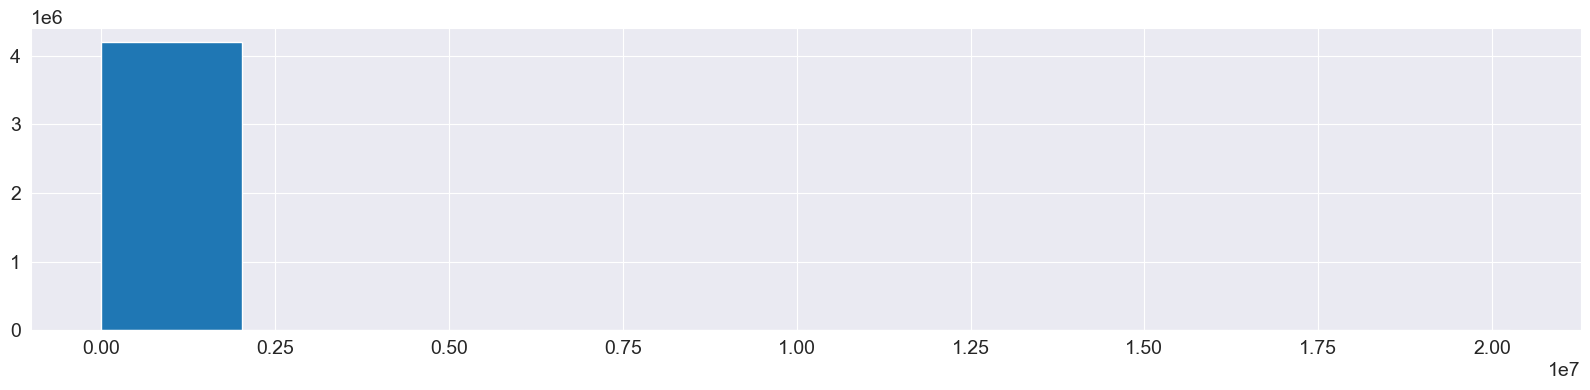

In [134]:
# histogram of trip duration
plt.figure(figsize=(20, 4))
df["trip_duration"].hist()
df["trip_duration"].describe()

In [135]:
df = df[df["trip_duration"] > 0]
iqr_duration = df["trip_duration"].quantile(0.75) - df["trip_duration"].quantile(0.25)
# remove outliers
df = df[df["trip_duration"] < df["trip_duration"].quantile(0.75) + 10 * iqr_duration]
df["trip_duration"].describe()

count    4.143101e+06
mean     6.249631e+02
std      6.770292e+02
min      1.000000e+00
25%      2.540000e+02
50%      4.040000e+02
75%      6.920000e+02
max      5.260000e+03
Name: trip_duration, dtype: float64

<Axes: >

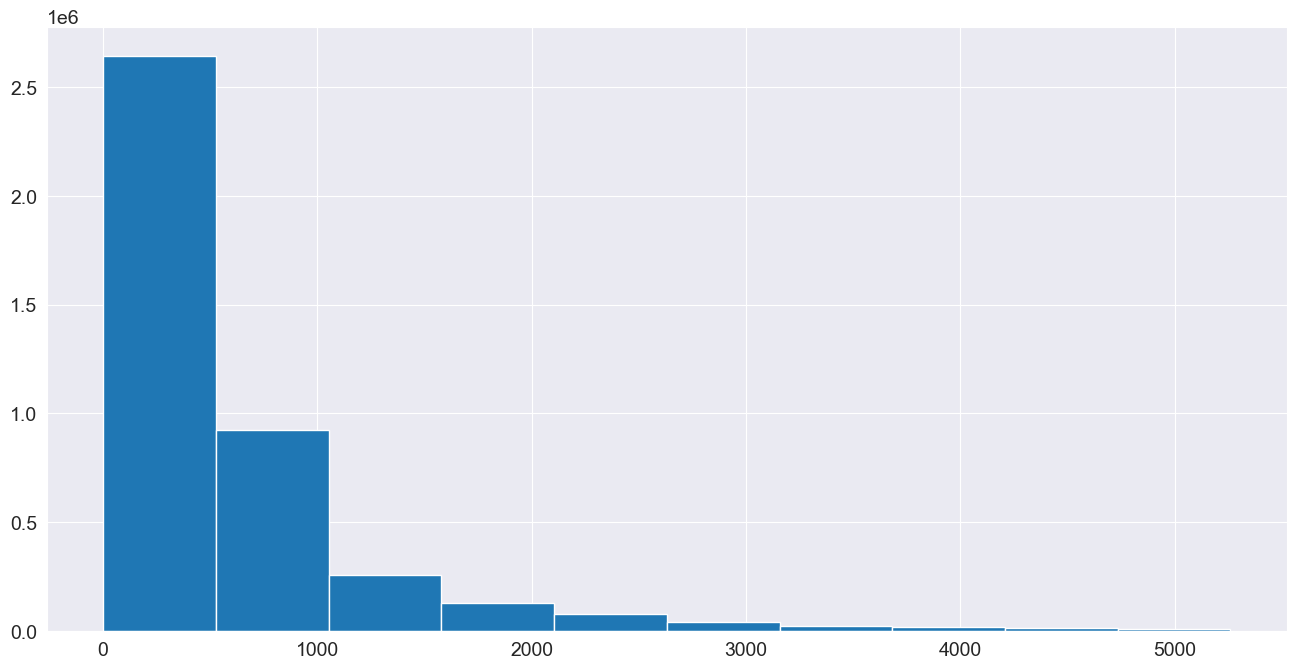

In [136]:
df["trip_duration"].hist()

# User type 

Aggregating user_type and member_casual into one categorical variable, where 1 is subscriber and 0 is regular customer

In [137]:
df["member_casual"].value_counts()

member_casual
member    1686804
casual     797937
Name: count, dtype: int64

In [138]:
df["user_type"].value_counts()

user_type
Subscriber    1468186
Customer       189687
Name: count, dtype: int64

In [139]:
df["user_type"] = df["user_type"].map({"Subscriber": "1", "Customer": "0"})
df["member_casual"] = df["member_casual"].map({"member": "1", "casual": "0"})

In [140]:
df["user_type"] = df["user_type"].fillna(df["member_casual"])
df = df.drop(columns=["member_casual"])
df["user_type"].value_counts()

user_type
1    3154990
0     987624
Name: count, dtype: int64

# Removing geographical outliers

In [141]:
df.shape

(4143101, 17)

<Axes: >

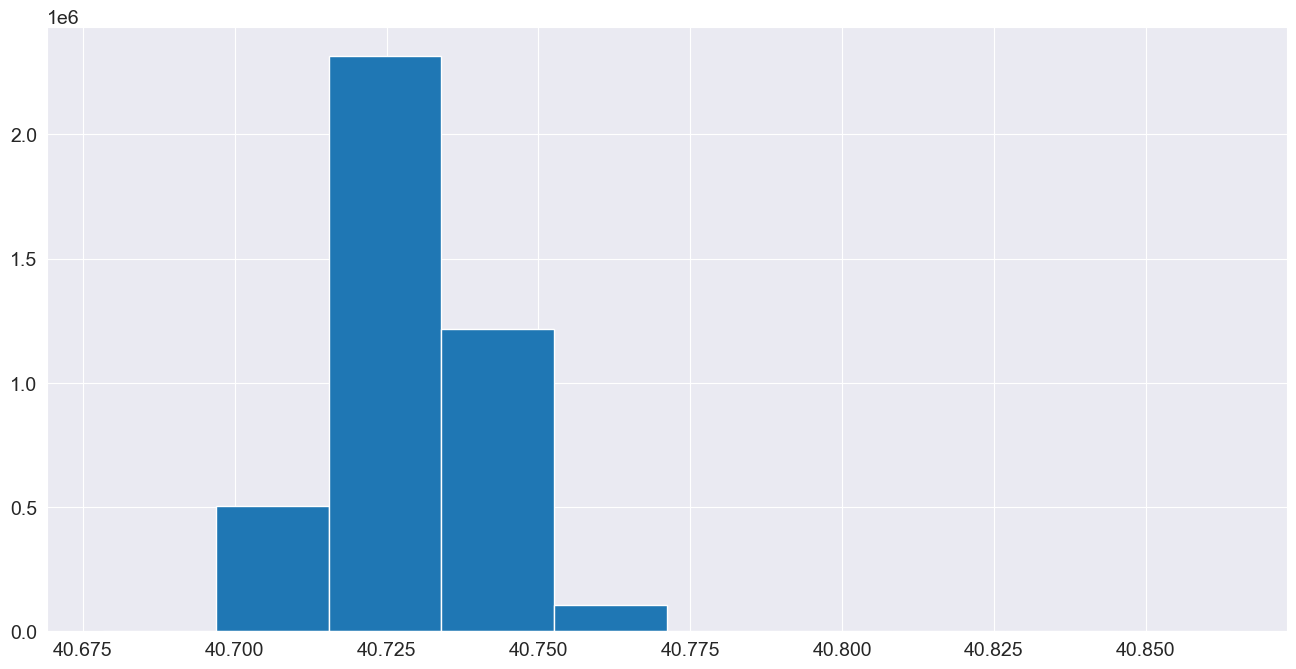

In [142]:
df["start_station_latitude"].hist()

In [143]:
df["start_station_latitude"].describe()

count    4.143101e+06
mean     4.072809e+01
std      1.141825e-02
min      4.067833e+01
25%      4.071925e+01
50%      4.072569e+01
75%      4.073698e+01
max      4.086394e+01
Name: start_station_latitude, dtype: float64

In [144]:
df["end_station_latitude"].describe()


count    4.142374e+06
mean     4.072025e+01
std      5.578654e-01
min      0.000000e+00
25%      4.071925e+01
50%      4.072534e+01
75%      4.073698e+01
max      4.087241e+01
Name: end_station_latitude, dtype: float64

<Axes: >

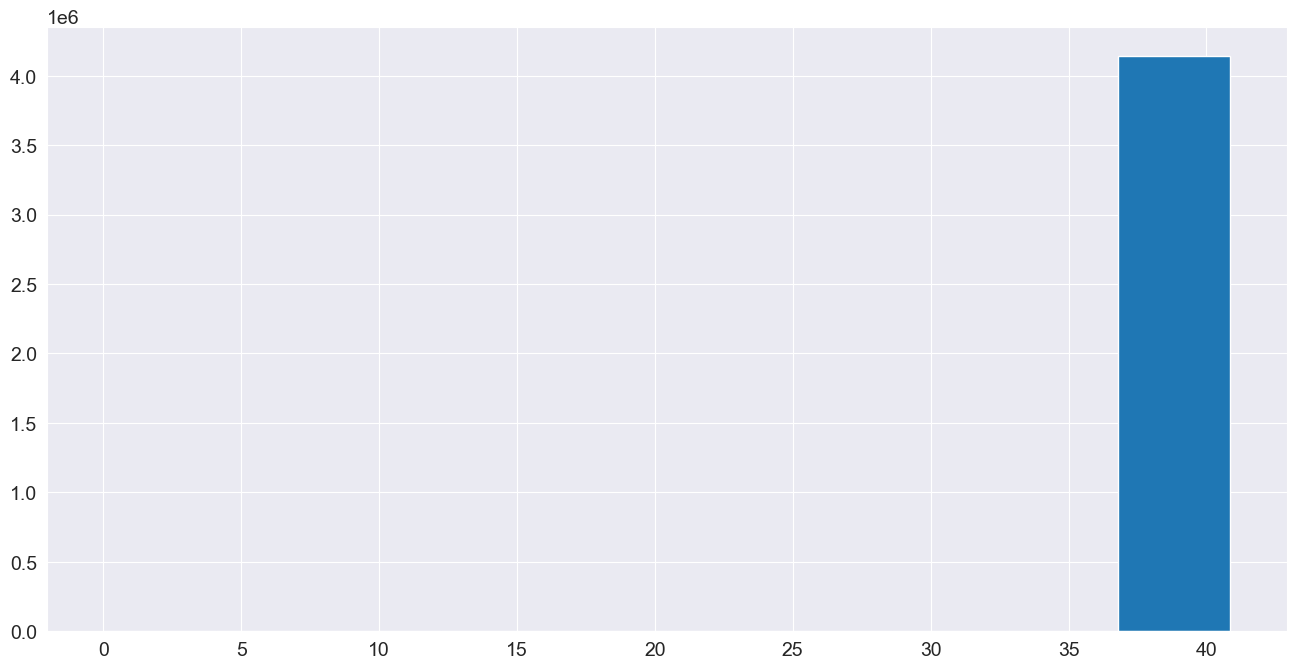

In [145]:
df["end_station_latitude"].hist()

<Axes: >

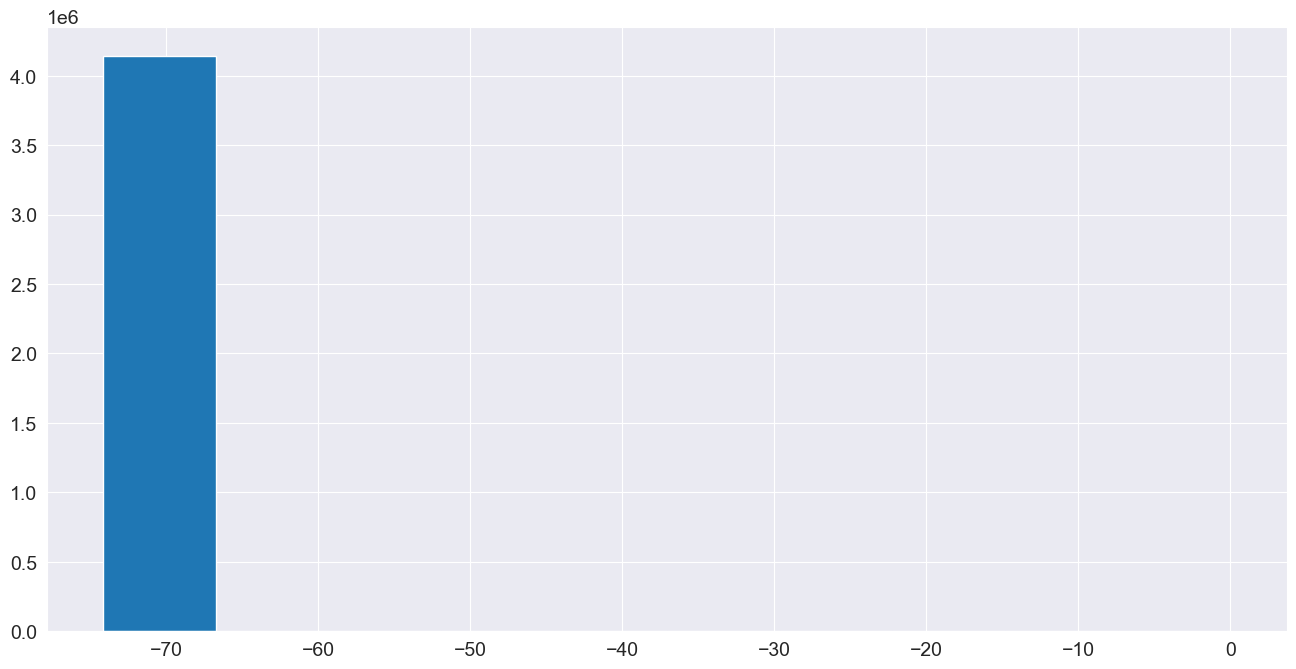

In [146]:
df["end_station_longitude"].hist()


In [147]:
iqr_end_lat = df["end_station_latitude"].quantile(0.75) - df["end_station_latitude"].quantile(0.25)
iqr_end_long = df["end_station_longitude"].quantile(0.75) - df["end_station_longitude"].quantile(0.25)

df = df[df["end_station_latitude"] < df["end_station_latitude"].quantile(0.75) + 6 * iqr_end_lat]
df = df[df["end_station_longitude"] < df["end_station_longitude"].quantile(0.75) + 6 * iqr_end_long]
df = df[df["end_station_latitude"] > df["end_station_latitude"].quantile(0.75) - 6 * iqr_end_lat]
df = df[df["end_station_longitude"] > df["end_station_longitude"].quantile(0.75) - 6 * iqr_end_long]
df.shape

(4141445, 17)

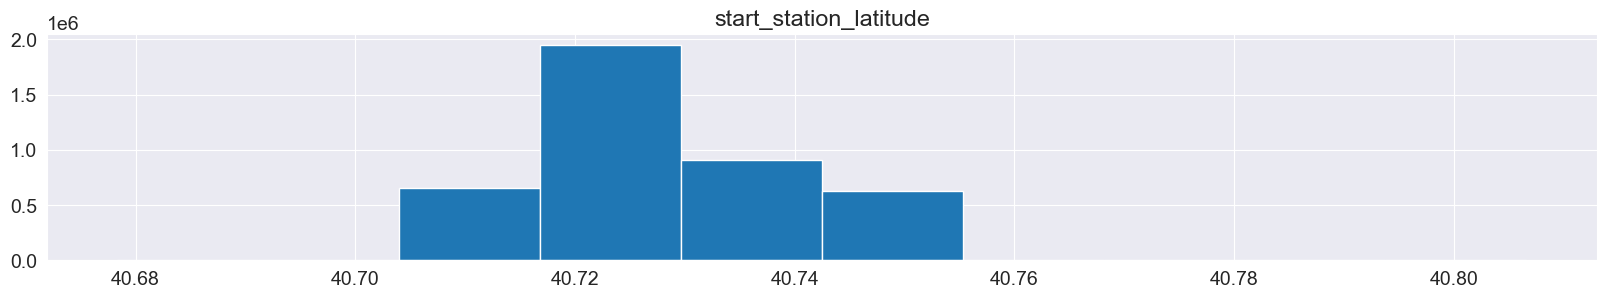

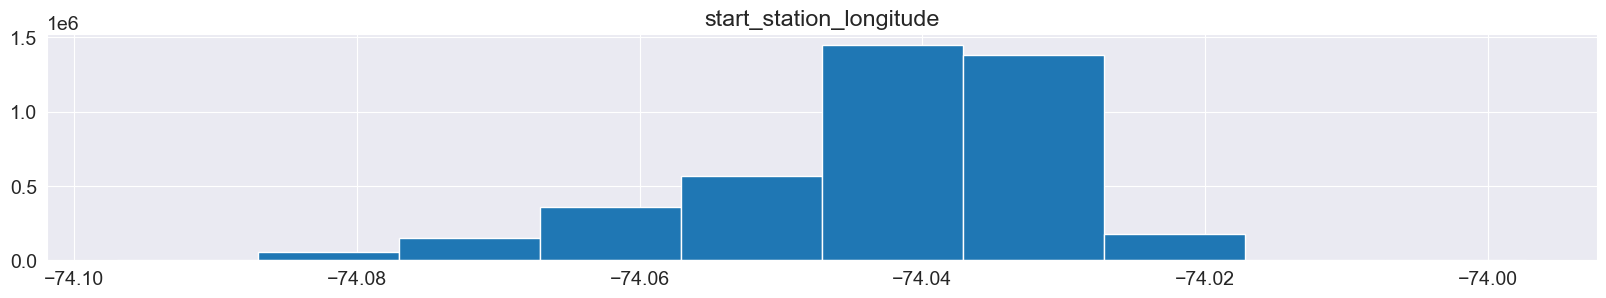

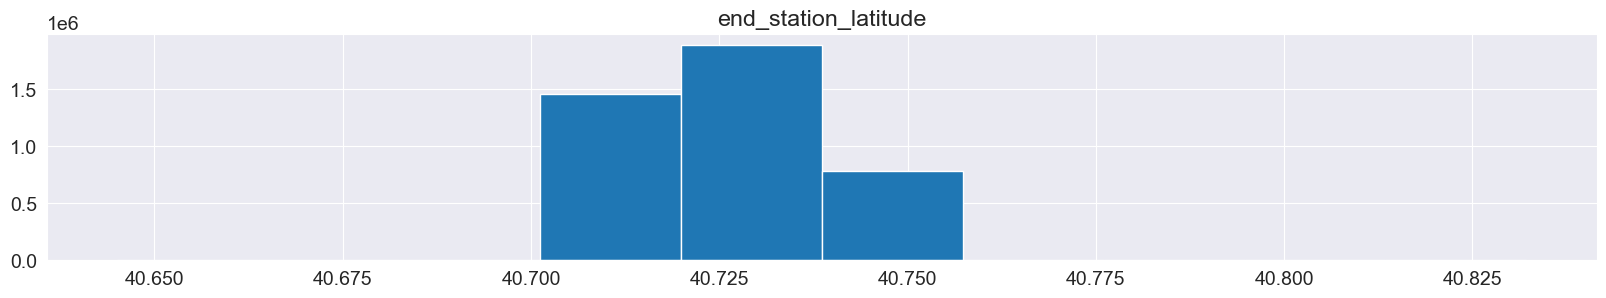

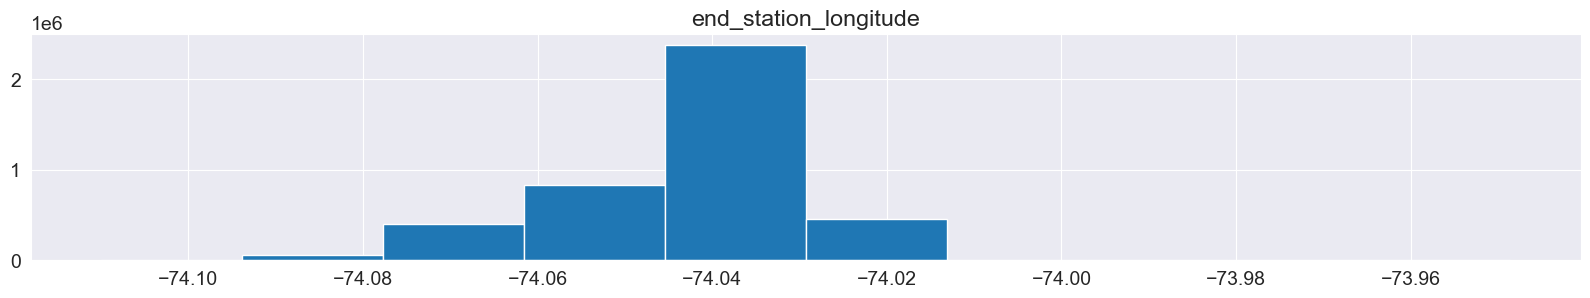

In [148]:
for col in ["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude"]:
    plt.figure(figsize=(20, 3))
    df[col].hist()
    plt.title(col)
    plt.show()

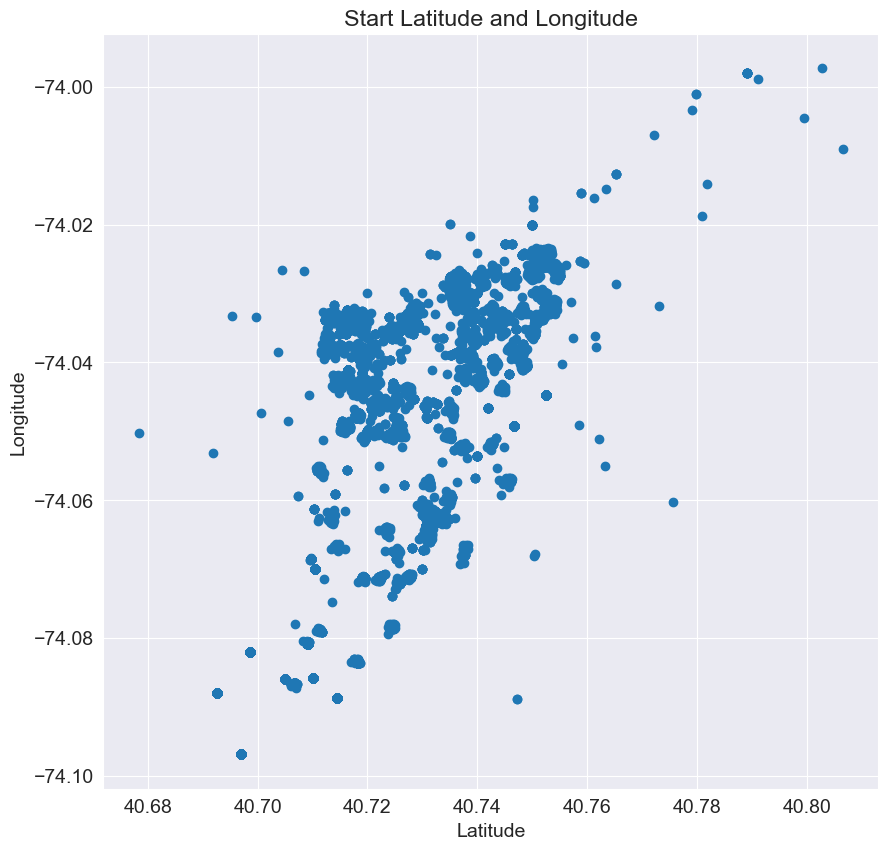

In [149]:
# Plot of start latitude and longitude
plt.figure(figsize=(10, 10))
plt.scatter(df["start_station_latitude"], df["start_station_longitude"])
plt.title("Start Latitude and Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

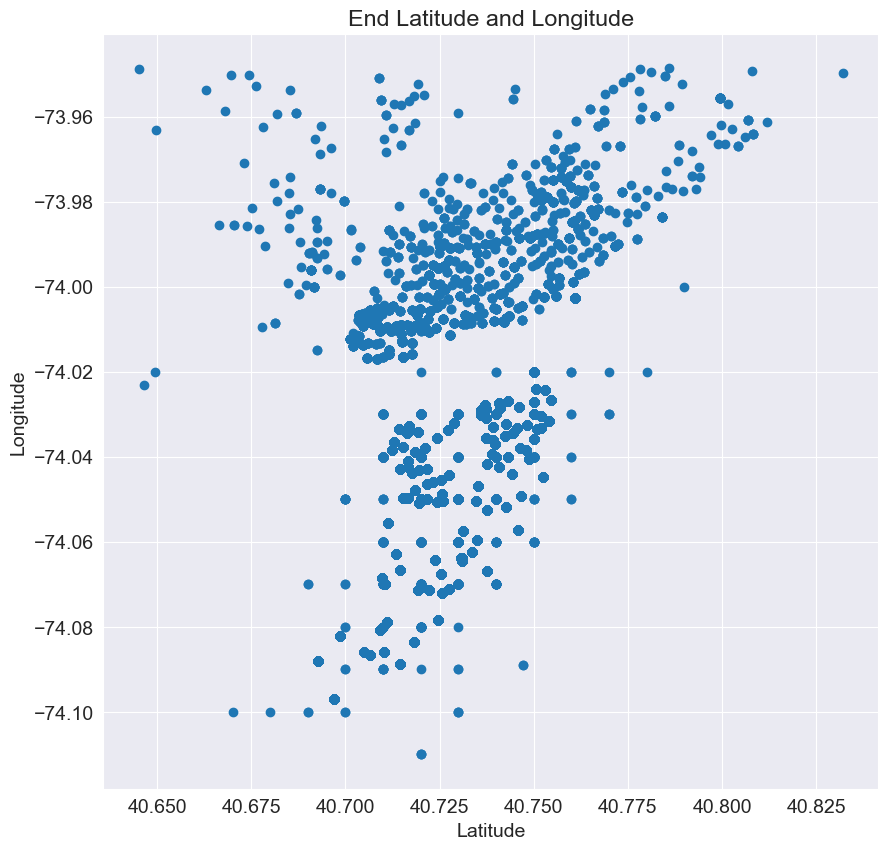

In [150]:

plt.figure(figsize=(10, 10))
plt.scatter(df["end_station_latitude"], df["end_station_longitude"])
plt.title("End Latitude and Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

# Re-running the profiling after data cleaning


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/emi/Gro/Dev/playground/venv/lib/python3.9/site-packages/ydata_profiling/model/typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
/Users/emi/Gro/Dev/playground/venv/lib/python3.9/site-packages/ydata_profiling/model/typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
/Users/emi/Gro/Dev/playground/venv/lib/python3.9/site-packages/ydata_profiling/model/typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
/Users/emi/Gro/Dev/playground/venv/lib/python3.9/site-packages/ydata_profiling/mode

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'data_report/citi_bike_data_cleaned_profiling_report.html'

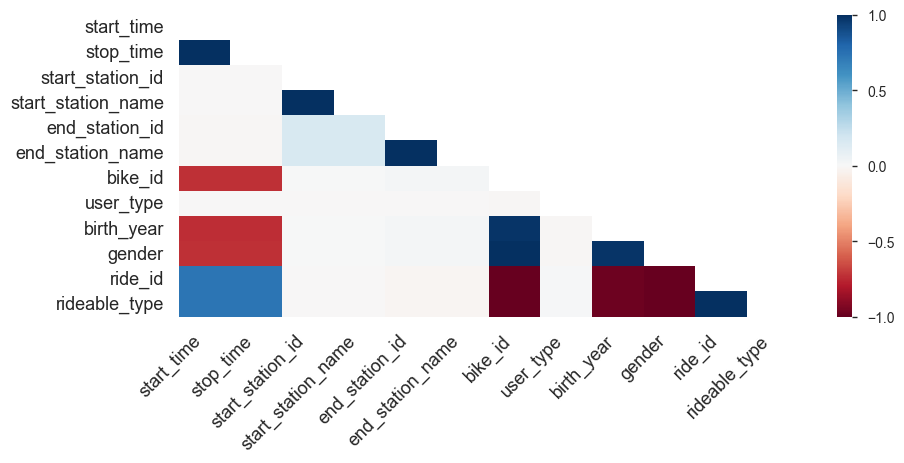

In [151]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Citi Bike Data Profiling Report', explorative=True)
profile.to_file('data_report/citi_bike_data_cleaned_profiling_report.html')

df.to_csv('data/citi_bike_data_cleaned.csv', index=False)